# Predicting the stock market

This is a testing project to practice ML.

#### Imports

In [67]:
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score
import pandas as pd

#### Getting data

In [ ]:
sp500 = yf.Ticker("^GSPC")
df = sp500.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,0.0,0.0
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,0.0,0.0
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000,0.0,0.0


#### Visualizing the data

<Axes: xlabel='Date'>

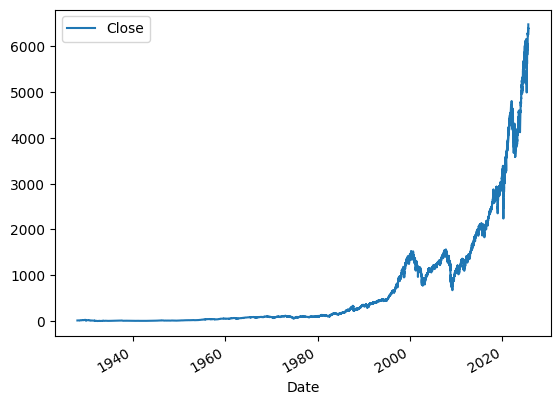

In [69]:
df.plot.line(y="Close", use_index=True)

#### Selecting the Most Relevant Features:

We can remove "Dividens" and "Stock Splits" since they are more appropriate for inidividual stocks and not the index

In [70]:
del df["Dividends"]
del df["Stock Splits"]

df

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000


#### Feature Engineering

In [71]:
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195,0
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000,6445.759766,1


In [72]:
# Removing old instances
df = df.loc["1990-01-01":].copy()
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195,0
2025-08-11 00:00:00-04:00,6389.669922,6407.250000,6364.060059,6373.450195,4652400000,6445.759766,1


#### Training model

- A Random Forest algorithm was chosen for its robustness against overfitting, fast training performance, and ability to capture complex, non-linear relationships within the data.

In [73]:
# Instantiating model
model = RandomForestClassifier(
    n_estimators=200, # Use 200 decision trees in the ensemble for more stable predictions
    min_samples_split=100, # Require at least 100 samples to split an internal node, helping reduce overfitting
    random_state=1 # Set a fixed seed to ensure reproducible results
)

# Separating data into train and test
train = df.iloc[:-200]
test = df.iloc[-200:]

# Getting predictiors
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Getting predictors and target for training
x_train = train[predictors]
y_train = train["Target"]

# Getting predictors and target for testing
x_test = test[predictors]
y_test = test["Target"]

# Traning model
model.fit(x_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Evaluating Model

In [74]:
# Getting predicted values for testing dataframe
predictions = model.predict(x_test)
predictions = pd.DataFrame(predictions, index=test.index, columns=["Predictions"])

predictions

,Predictions
Date,
2024-10-24 00:00:00-04:00,1
2024-10-25 00:00:00-04:00,1
2024-10-28 00:00:00-04:00,1
2024-10-29 00:00:00-04:00,1
2024-10-30 00:00:00-04:00,1
...,...
2025-08-07 00:00:00-04:00,0
2025-08-08 00:00:00-04:00,0
2025-08-11 00:00:00-04:00,0


In [75]:
# Combining predictions with actual values
combined = pd.concat([y_test, predictions], axis=1)

# Getting precision Score
precision = precision_score(test["Target"], predictions)

# Gettign accuracy
accuracy = accuracy_score(test["Target"], predictions)

# Displaying metrics
print(f"Precision: {precision:.2%}")
print(f"Accuracy: {accuracy:.2%}")

Precision: 66.67%
Accuracy: 50.50%


To have a better graps of the model's performance, we will do backtesting.

Backtesting - Testing the model on historical data:

In [76]:
def predict(train, test, predictors, model):

    # Training model
    model.fit(train[predictors], train["Target"])

    # Generating predictions
    preds = model.predict(test[predictors])

    # Creating a DataFrame with predictions
    preds = pd.Series(preds, index=test.index, name="Predictions")

    # Returning dataframe with predictions
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined


In [77]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    # Looping across data, year by year
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Generating predictions
        predictions = predict(train, test, predictors, model)

        # Appending predictions
        all_predictions.append(predictions)
    
    # Returning all predictions together
    return pd.concat(all_predictions)


In [78]:
predictions = backtest(df, model, predictors)

In [79]:
predictions["Predictions"].value_counts()

Predictions
0    3739
1    2731
Name: count, dtype: int64

In [80]:
# Getting evaluation metrics
precision = precision_score(predictions["Target"], predictions["Predictions"])
accuracy = accuracy_score(predictions["Target"], predictions["Predictions"])


# Displaying
print(f"Precision: {precision:.2%}")
print(f"Accuracy: {accuracy:.2%}")

Precision: 52.84%
Accuracy: 48.72%


#### Feature Engineering

Since the model did not perfomed as good as we wanted, we will add more features to give it more context

In [81]:
# Adding previous days information
prev_days = [2, 5, 60, 250, 1000]

# List to store predictors
new_predictors = []

# Adding information about previous days to dataset
for day in prev_days:

    # Adding Close Ratio column
    ratio_column = f"Close Ratio {day}"
    df[ratio_column] = df["Close"] / df.rolling(day).mean()["Close"]

    # Adding Trend column
    trend_column = f"Trend {day}"
    df[trend_column] = df.shift(1).rolling(day).sum()["Target"]

    # Adding new predictors
    new_predictors += [ratio_column, trend_column]


In [82]:
# Dropping NA columns
df = df.dropna()

In [83]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close Ratio 2,Trend 2,Close Ratio 5,Trend 5,Close Ratio 60,Trend 60,Close Ratio 250,Trend 250,Close Ratio 1000,Trend 1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0,1.003628,1.0,1.005506,2.0,1.037735,36.0,1.084560,144.0,1.324405,530.0
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1,0.999601,1.0,1.004684,2.0,1.035508,35.0,1.082850,144.0,1.322830,529.0
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195,0,1.003885,1.0,1.007684,3.0,1.042158,35.0,1.090499,144.0,1.332614,529.0


#### Improving model

In [84]:
# Updating model
model = RandomForestClassifier(
    n_estimators=200, 
    min_samples_split=50,
    random_state=1 
)

In [85]:
# Updating predict function to return the probability of the predictions based on the model guesses 
def predict(train, test, predictors, model):

    # Training model
    model.fit(train[predictors], train["Target"])

    # Generating predictions probabilities
    preds = model.predict_proba(test[predictors])[:, 1]
    
    # Only saying that the market will go up, if the model is more than 60% sure
    preds[preds >= .6] = 1
    preds[preds < .6] = 0

    # Creating a DataFrame with predictions
    preds = pd.Series(preds, index=test.index, name="Predictions")

    # Returning dataframe with predictions
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined


In [86]:
predictions = backtest(df, model, new_predictors)

In [87]:
predictions["Predictions"].value_counts()

Predictions
0.0    4600
1.0     869
Name: count, dtype: int64

In [88]:
# Getting precision Score
precision = precision_score(predictions["Target"], predictions["Predictions"])

# Gettign accuracy
accuracy = accuracy_score(predictions["Target"], predictions["Predictions"])

# Displaying metrics
print(f"Precision: {precision:.2%}")
print(f"Accuracy: {accuracy:.2%}")

Precision: 57.42%
Accuracy: 47.72%


## Conclusion

This project demonstrates the application of machine learning techniques to financial time series data, specifically for predicting the direction of the S&P 500 index. Using Python, yfinance, pandas, and scikit-learn, I engineered features, trained and evaluated a Random Forest classifier, and implemented backtesting to assess model performance over historical data. While the model's predictive power is limited by the inherent complexity and randomness of financial markets, this project highlights my ability to collect, preprocess, and analyze real-world data, build and tune machine learning models, and critically evaluate results. 